# Task 1

In [86]:
import os
import random
import numpy as np
import pandas as pd
from math import sqrt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt


import torch
import torch.nn as nn
import torch.utils.data
import torch.optim as optim
from torchsummary import summary
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

In [2]:
!unzip data_transaction.zip
!unzip data_identity.zip

Archive:  data_transaction.zip
  inflating: data_transaction.csv    
Archive:  data_identity.zip
  inflating: data_identity.csv       


In [3]:
#data_trans = pd.read_csv("C:\\Users\\User\\Downloads\\IU\\AML\\Assignments\\A2\ieee-fraud-detection\data_transaction.csv")
#data_identity = pd.read_csv("C:\\Users\\User\\Downloads\\IU\\AML\\Assignments\\A2\ieee-fraud-detection\data_identity.csv")
data_trans = pd.read_csv("data_transaction.csv")
data_identity = pd.read_csv("data_identity.csv")



In [4]:
print("data transaction shape", data_trans.shape)
print("data identity shape", data_identity.shape)

data transaction shape (590540, 394)
data identity shape (144233, 41)


#### Prepare Data

In [5]:
#df = data_trans.merge(data_identity, how='left', left_index=True, right_index=True)
# Merge the tables 
df = pd.merge(left=data_trans, right=data_identity, left_on='TransactionID', right_on='TransactionID')

df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,0,86549,75.887,C,16496,352.0,117.0,mastercard,134.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,0,86555,16.495,C,4461,375.0,185.0,mastercard,224.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0,86620,30.000,H,1790,555.0,150.0,visa,226.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [6]:
del data_trans
del data_identity

In [7]:
df.shape 

(144233, 434)

In [8]:
list_cat = list(df.select_dtypes('object').columns.values)

In [9]:
# Remove the categorical data
df.drop(df[list_cat], axis = 1, inplace = True)

In [10]:
df.shape

(144233, 403)

In [11]:
# Remove empty columns
emp = [col for col in df.columns if df[col].isnull().values.all()]
df.drop(df[emp], axis = 1, inplace = True)

In [12]:
df.shape

(144233, 390)

In [13]:
y = df['isFraud'].to_numpy()
df.drop('isFraud', axis = 1, inplace = True)

#### Split the dataset

In [14]:
df.head()

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
0,2987004,86506,50.000,4497,514.0,150.0,102.0,420.0,87.0,NaN,...,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,32.0
1,2987008,86535,15.000,2803,100.0,150.0,226.0,337.0,87.0,NaN,...,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,32.0
2,2987010,86549,75.887,16496,352.0,117.0,134.0,NaN,NaN,NaN,...,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2987011,86555,16.495,4461,375.0,185.0,224.0,NaN,NaN,30.0,...,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2987016,86620,30.000,1790,555.0,150.0,226.0,170.0,87.0,NaN,...,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,24.0


In [15]:
df_clear = df.notna().astype("int").to_numpy()


In [16]:
mask = df.fillna(0)

In [17]:
sc = StandardScaler()
mask = sc.fit_transform(mask.to_numpy())

In [18]:
full_data = np.hstack([mask, df_clear])

In [19]:
full_data.shape

(144233, 778)

In [20]:
#Splitting 
X_train, X_test, y_train, y_test = train_test_split( full_data, y, test_size=0.2, random_state=123)

In [21]:
X_train.shape

(115386, 778)

#### Define the models

#### Undercomplete AE

In [22]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [23]:
## Undercomplete

class autoencoder(nn.Module):
    def __init__(self, input_size, latent_dim):
      super(autoencoder, self).__init__()
      # Step 1 : Define the encoder 
      # Step 2 : Define the decoder
      # Step 3 : Initialize the weights (optional)
      self.encoder = nn.Sequential(
          nn.Linear(input_size, input_size//2),
          nn.ReLU(True),
          nn.Linear(input_size//2, input_size//3),
          nn.Linear(input_size//3, input_size//4),
          nn.Tanh(),
          nn.Linear(input_size//4, latent_dim)
      )
      self.decoder = nn.Sequential(
          nn.Linear(latent_dim, input_size//4),
          nn.ReLU(True),
          nn.Linear(input_size//4, input_size//3),
          nn.Tanh(),
          nn.Linear(input_size//3, input_size//2)
      )
      self.encoder.apply(self.__init_weights)
      self.decoder.apply(self.__init_weights)
        
    def forward(self, x):
      # Step 1: Pass the input through encoder to get latent representation
      # Step 2: Take latent representation and pass through decoder
      x = self.encoder(x)
      x = self.decoder(x)
      return x
        
    
    def encode(self,input):
      #Step 1: Pass the input through the encoder to get latent representation
      return self.encoder(input)
    
    def decode(self, input):
      return self.decoder(input)
    
    def __init_weights(self,m):
      #Init the weights (optional)
      if type(m) == nn.Linear:
          torch.nn.init.xavier_uniform_(m.weight)
          m.bias.data.fill_(0.01)

In [24]:
full_data.shape

(144233, 778)

In [25]:
# Define training parameters

min_lose = 10
batchSize = 512
learning_rate = 0.001
num_epochs = 50
latent_size = 50
###sample = torch.randn((batchSize,1,64))
AE = autoencoder(full_data.shape[1] , latent_size).to(device)
print(AE)
# print(summary(AE,input_size=(1, 64)))

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(AE.parameters(),lr=learning_rate)

# create DataLoaders
dataLoader_train = DataLoader(TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train)), batch_size=batchSize, shuffle=True)
dataLoader_test = DataLoader(TensorDataset(torch.Tensor(X_test), torch.Tensor(y_test)), batch_size=batchSize, shuffle=True)

autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=778, out_features=389, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=389, out_features=259, bias=True)
    (3): Linear(in_features=259, out_features=194, bias=True)
    (4): Tanh()
    (5): Linear(in_features=194, out_features=50, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=50, out_features=194, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=194, out_features=259, bias=True)
    (3): Tanh()
    (4): Linear(in_features=259, out_features=389, bias=True)
  )
)


In [26]:
## Trainning the Autoencoder
ind = full_data.shape[1]//2
for epoch in range(num_epochs):
  epoch_loss = 0.0
  for X in dataLoader_train:
    X = X[0].to(device)
    optimizer.zero_grad()

    # forward
    output = AE(X)
    loss = criterion(output * X[:, ind:], X[:, :ind])
    #print(output.dtype)
    # backward
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item()
  # log

  print('epoch [{}/{}], train_loss:{:.4f}'.format(epoch + 1, num_epochs, epoch_loss / len(dataLoader_train)))

epoch [1/50], train_loss:0.4612
epoch [2/50], train_loss:0.3021
epoch [3/50], train_loss:0.2599
epoch [4/50], train_loss:0.2374
epoch [5/50], train_loss:0.2232
epoch [6/50], train_loss:0.2105
epoch [7/50], train_loss:0.2099
epoch [8/50], train_loss:0.2030
epoch [9/50], train_loss:0.1968
epoch [10/50], train_loss:0.1956
epoch [11/50], train_loss:0.1939
epoch [12/50], train_loss:0.1853
epoch [13/50], train_loss:0.1825
epoch [14/50], train_loss:0.1835
epoch [15/50], train_loss:0.1780
epoch [16/50], train_loss:0.1767
epoch [17/50], train_loss:0.1765
epoch [18/50], train_loss:0.1799
epoch [19/50], train_loss:0.1729
epoch [20/50], train_loss:0.1725
epoch [21/50], train_loss:0.1780
epoch [22/50], train_loss:0.1693
epoch [23/50], train_loss:0.3688
epoch [24/50], train_loss:0.2939
epoch [25/50], train_loss:0.2664
epoch [26/50], train_loss:0.2527
epoch [27/50], train_loss:0.2381
epoch [28/50], train_loss:0.2294
epoch [29/50], train_loss:0.2248
epoch [30/50], train_loss:0.2168
epoch [31/50], trai

In [27]:
# Test 
min_undercomplete_loss = 10
top = AE.state_dict()

for epoch in range(num_epochs):
  with torch.no_grad():
    loss = 0
    for X in dataLoader_test:
      X = X[0].to(device)
      
      output = AE(X)
      loss += criterion(output * X[:, ind:], X[:, :ind]).item()
    res = loss / len(dataLoader_test)
    if res < min_undercomplete_loss:
        min_undercomplete_loss = res
        top = AE.state_dict()
    else: 
        AE.load_state_dict(top)
    print('epoch [{}/{}], test_loss:{:.4f}'.format(epoch + 1, num_epochs, res ))

epoch [1/50], test_loss:0.2050
epoch [2/50], test_loss:0.2048
epoch [3/50], test_loss:0.2081
epoch [4/50], test_loss:0.2049
epoch [5/50], test_loss:0.2053
epoch [6/50], test_loss:0.2048
epoch [7/50], test_loss:0.2046
epoch [8/50], test_loss:0.2056
epoch [9/50], test_loss:0.2050
epoch [10/50], test_loss:0.2051
epoch [11/50], test_loss:0.2048
epoch [12/50], test_loss:0.2052
epoch [13/50], test_loss:0.2050
epoch [14/50], test_loss:0.2050
epoch [15/50], test_loss:0.2060
epoch [16/50], test_loss:0.2051
epoch [17/50], test_loss:0.2324
epoch [18/50], test_loss:0.2059
epoch [19/50], test_loss:0.2049
epoch [20/50], test_loss:0.2049
epoch [21/50], test_loss:0.2049
epoch [22/50], test_loss:0.2051
epoch [23/50], test_loss:0.2047
epoch [24/50], test_loss:0.2052
epoch [25/50], test_loss:0.2051
epoch [26/50], test_loss:0.2049
epoch [27/50], test_loss:0.2049
epoch [28/50], test_loss:0.2275
epoch [29/50], test_loss:0.2049
epoch [30/50], test_loss:0.2050
epoch [31/50], test_loss:0.2049
epoch [32/50], te

#### Regularized AE 

**Sparse autoencoder**

In [28]:
def regLoss(data):
    AE_children = list(AE.children())
    l = 0
    v = data
    for x in range(len(AE_children)):
        v = F.relu((AE_children[x](v)))
        l += torch.mean(torch.abs(v))
    return l

In [29]:
# Train
for epoch in range(num_epochs):
  epoch_loss = 0.0
  for X in dataLoader_train:
    X = X[0].to(device)
    optimizer.zero_grad()

    # forward
    output = AE(X)
    loss = criterion(output * X[:, ind:], X[:, :ind])
    l1_loss = regLoss(X)
    loss = loss +  l1_loss
    #print(output.dtype)
    # backward
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item()
  # log
  print('epoch [{}/{}], train_loss:{:.4f}'.format(epoch + 1, num_epochs, epoch_loss / len(dataLoader_train)))

epoch [1/50], train_loss:0.3662
epoch [2/50], train_loss:0.2370
epoch [3/50], train_loss:0.2210
epoch [4/50], train_loss:0.2218
epoch [5/50], train_loss:0.2099
epoch [6/50], train_loss:0.2064
epoch [7/50], train_loss:0.2082
epoch [8/50], train_loss:0.1993
epoch [9/50], train_loss:0.1966
epoch [10/50], train_loss:0.1938
epoch [11/50], train_loss:0.1977
epoch [12/50], train_loss:0.2025
epoch [13/50], train_loss:0.1966
epoch [14/50], train_loss:0.1903
epoch [15/50], train_loss:0.1922
epoch [16/50], train_loss:0.1930
epoch [17/50], train_loss:0.1870
epoch [18/50], train_loss:0.1913
epoch [19/50], train_loss:0.1999
epoch [20/50], train_loss:0.2017
epoch [21/50], train_loss:0.1914
epoch [22/50], train_loss:0.1864
epoch [23/50], train_loss:0.1866
epoch [24/50], train_loss:0.1850
epoch [25/50], train_loss:0.1837
epoch [26/50], train_loss:0.1811
epoch [27/50], train_loss:0.1803
epoch [28/50], train_loss:0.1824
epoch [29/50], train_loss:0.1944
epoch [30/50], train_loss:0.1870
epoch [31/50], trai

In [30]:
# Test
min_reg_ae = 10
for epoch in range(num_epochs):
  with torch.no_grad():
    loss = 0
    for X in dataLoader_test:
      X = X[0].to(device)
      
      output = AE(X)
      loss += criterion(output * X[:, ind:], X[:, :ind]).item()
    
    print('epoch [{}/{}], test_loss:{:.4f}'.format(epoch + 1, num_epochs, loss / len(dataLoader_test)))
    if (loss / len(dataLoader_test)) < min_reg_ae:
      min_reg_ae = (loss / len(dataLoader_test))

epoch [1/50], test_loss:0.2000
epoch [2/50], test_loss:0.1999
epoch [3/50], test_loss:0.1997
epoch [4/50], test_loss:0.1999
epoch [5/50], test_loss:0.1999
epoch [6/50], test_loss:0.2027
epoch [7/50], test_loss:0.1998
epoch [8/50], test_loss:0.1997
epoch [9/50], test_loss:0.2000
epoch [10/50], test_loss:0.1999
epoch [11/50], test_loss:0.1999
epoch [12/50], test_loss:0.2003
epoch [13/50], test_loss:0.1998
epoch [14/50], test_loss:0.2003
epoch [15/50], test_loss:0.1999
epoch [16/50], test_loss:0.1998
epoch [17/50], test_loss:0.2000
epoch [18/50], test_loss:0.1999
epoch [19/50], test_loss:0.2008
epoch [20/50], test_loss:0.1997
epoch [21/50], test_loss:0.1998
epoch [22/50], test_loss:0.1997
epoch [23/50], test_loss:0.2008
epoch [24/50], test_loss:0.1997
epoch [25/50], test_loss:0.2009
epoch [26/50], test_loss:0.1998
epoch [27/50], test_loss:0.1998
epoch [28/50], test_loss:0.1999
epoch [29/50], test_loss:0.1998
epoch [30/50], test_loss:0.2010
epoch [31/50], test_loss:0.1998
epoch [32/50], te

#### Variational AE 

In [31]:
# VAE model
class VAE(nn.Module):
    def __init__(self, input_dim= full_data.shape[1], h_dim= 389, z_dim=5):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_dim, h_dim)
        self.fc2 = nn.Linear(h_dim, z_dim)
        self.fc3 = nn.Linear(h_dim, z_dim)
        self.fc4 = nn.Linear(z_dim, h_dim)
        self.fc5 = nn.Linear(h_dim, input_dim//2)
        
    def encode(self, x):
        h = F.relu(self.fc1(x))
        return self.fc2(h), self.fc3(h)
    
    def reparameterize(self, mu, log_var):
        std = torch.exp(log_var/2)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = F.relu(self.fc4(z))
        return self.fc5(h)
    
    def forward(self, x):
        mu, log_var = self.encode(x)
        z = self.reparameterize(mu, log_var)
        x_reconst = self.decode(z)
        return x_reconst, mu, log_var

model = VAE().to(device)

In [32]:
print(model)


VAE(
  (fc1): Linear(in_features=778, out_features=389, bias=True)
  (fc2): Linear(in_features=389, out_features=5, bias=True)
  (fc3): Linear(in_features=389, out_features=5, bias=True)
  (fc4): Linear(in_features=5, out_features=389, bias=True)
  (fc5): Linear(in_features=389, out_features=389, bias=True)
)


In [33]:
# Train
for epoch in range(num_epochs):
  epoch_loss = 0.0
  for X in dataLoader_train:
    X = X[0].to(device)
    optimizer.zero_grad()

    # forward
    x_reconst, mu, log_var = model(X)
    loss = criterion(x_reconst*X[:, ind:], X[:, :ind])
    kl_div = - 0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    loss += kl_div

    #print(output.dtype)
    # backward
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item()
  # log
  print('epoch [{}/{}], train_loss:{:.4f}'.format(epoch + 1, num_epochs, loss.item()))

epoch [1/50], train_loss:32.5471
epoch [2/50], train_loss:25.9521
epoch [3/50], train_loss:32.1549
epoch [4/50], train_loss:32.6807
epoch [5/50], train_loss:20.9882
epoch [6/50], train_loss:23.0161
epoch [7/50], train_loss:28.7523
epoch [8/50], train_loss:31.4485
epoch [9/50], train_loss:29.0393
epoch [10/50], train_loss:19.8426
epoch [11/50], train_loss:35.7764
epoch [12/50], train_loss:25.0710
epoch [13/50], train_loss:29.5866
epoch [14/50], train_loss:34.3789
epoch [15/50], train_loss:35.8678
epoch [16/50], train_loss:203.2830
epoch [17/50], train_loss:27.0489
epoch [18/50], train_loss:28.3591
epoch [19/50], train_loss:24.0067
epoch [20/50], train_loss:22.2269
epoch [21/50], train_loss:24.6657
epoch [22/50], train_loss:31.5977
epoch [23/50], train_loss:34.3280
epoch [24/50], train_loss:27.1938
epoch [25/50], train_loss:29.4029
epoch [26/50], train_loss:25.3846
epoch [27/50], train_loss:24.0688
epoch [28/50], train_loss:23.4872
epoch [29/50], train_loss:26.7886
epoch [30/50], train_l

In [34]:
# Test
min_variational_ae = 10
for epoch in range(num_epochs):
  with torch.no_grad():
    loss = 0
    for X in dataLoader_test:
      X = X[0].to(device)
      
      x_reconst, mu, log_var = model(X)
      loss += criterion(x_reconst * X[:, ind:], X[:, :ind]).item()
    
    print('epoch [{}/{}], test_loss:{:.4f}'.format(epoch + 1, num_epochs, loss / len(dataLoader_test)))
    if (loss / len(dataLoader_test)) < min_variational_ae:
      min_variational_ae = (loss / len(dataLoader_test))

epoch [1/50], test_loss:0.9592
epoch [2/50], test_loss:0.9570
epoch [3/50], test_loss:0.9597
epoch [4/50], test_loss:0.9555
epoch [5/50], test_loss:0.9567
epoch [6/50], test_loss:0.9550
epoch [7/50], test_loss:0.9544
epoch [8/50], test_loss:0.9539
epoch [9/50], test_loss:0.9578
epoch [10/50], test_loss:0.9562
epoch [11/50], test_loss:0.9573
epoch [12/50], test_loss:0.9577
epoch [13/50], test_loss:0.9600
epoch [14/50], test_loss:0.9626
epoch [15/50], test_loss:0.9562
epoch [16/50], test_loss:0.9563
epoch [17/50], test_loss:0.9626
epoch [18/50], test_loss:0.9564
epoch [19/50], test_loss:0.9607
epoch [20/50], test_loss:0.9568
epoch [21/50], test_loss:0.9570
epoch [22/50], test_loss:0.9605
epoch [23/50], test_loss:0.9711
epoch [24/50], test_loss:0.9562
epoch [25/50], test_loss:0.9563
epoch [26/50], test_loss:0.9587
epoch [27/50], test_loss:0.9573
epoch [28/50], test_loss:0.9547
epoch [29/50], test_loss:0.9557
epoch [30/50], test_loss:0.9561
epoch [31/50], test_loss:0.9606
epoch [32/50], te

### Perfomence of autoencoder

In [35]:
print("Undercomplete AE >> Best loss  ::", min_undercomplete_loss)
print("Regularized  AE >> Best loss  ::", min_reg_ae)
print("Variational AE >> Best loss  ::", min_variational_ae)

Undercomplete AE >> Best loss  :: 0.2046424273336143
Regularized  AE >> Best loss  :: 0.19962961971759796
Variational AE >> Best loss  :: 0.9533320173882601


####  Compare with statistical approaches

In [44]:
model = autoencoder(full_data.shape[1] , latent_size).to(device)
model.eval()


autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=778, out_features=389, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=389, out_features=259, bias=True)
    (3): Linear(in_features=259, out_features=194, bias=True)
    (4): Tanh()
    (5): Linear(in_features=194, out_features=50, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=50, out_features=194, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=194, out_features=259, bias=True)
    (3): Tanh()
    (4): Linear(in_features=259, out_features=389, bias=True)
  )
)

In [75]:

def create_data(data, model):
  train,target =[],[]
  for x, y in dataLoader_train:
      x = x.to(device)
      train.append(model(x).cpu().detach().numpy())
      target.append(y.cpu().detach().numpy())
  train = np.concatenate(train,  axis=0)
  target = np.concatenate(target,  axis=0)
  return train, target

train_x, train_y = create_data(dataLoader_train, model )
test_x, test_y = create_data(dataLoader_test, model )

In [71]:
clf = LogisticRegression(random_state=0).fit(train_x, train_y)
pred = clf.predict(test_x)
print(classification_report(test_y, pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97    106268
         1.0       0.80      0.33      0.46      9118

    accuracy                           0.94    115386
   macro avg       0.87      0.66      0.72    115386
weighted avg       0.93      0.94      0.93    115386



In [72]:
# Imputing the data with mean 

def create_data_mask(data, model, indicator):
  train,target, mask =[],[], []
  for x, y in dataLoader_train:
      x = x.cpu().detach().numpy()
      train.append(x[:, :indicator])
      mask.append(x[:, indicator:])
      target.append(y.cpu().detach().numpy())
  train = np.concatenate(train,  axis=0)
  mask = np.concatenate(mask,  axis=0)
  target = np.concatenate(target,  axis=0)
  train = np.where(mask < 1, np.ma.array(train, mask=(mask < 1)).mean(axis=0), train)
  return train, target

train_x, train_y = create_data_mask(dataLoader_train, model ,ind)
test_x, test_y = create_data_mask(dataLoader_test, model ,ind)



In [73]:
clf = LogisticRegression(random_state=0).fit(train_x, train_y)
pred = clf.predict(test_x)
print(classification_report(test_y, pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97    106268
         1.0       0.85      0.45      0.59      9118

    accuracy                           0.95    115386
   macro avg       0.90      0.72      0.78    115386
weighted avg       0.95      0.95      0.94    115386



## PCA Vs LDA

#### PCA

In [76]:
xTrain, yTrain = create_data(dataLoader_train, model )
xTest, yTest = create_data(dataLoader_test, model )

In [80]:
# survice function for Explained variance ratio plotting
def plot_explained_variance(X):
    #Calculating Eigenvecors and eigenvalues of Covariance matrix
    mean_vec = np.mean(X, axis=0)
    cov_mat = np.cov(X.T)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    # Create a list of (eigenvalue, eigenvector) tuples
    eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

    # Sort from high to low
    eig_pairs.sort(key = lambda x: x[0], reverse= True)

    # Calculation of Explained Variance from the eigenvalues
    tot = sum(eig_vals)
    print(tot)
    var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
    print(var_exp)
    cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance
    print(cum_var_exp)
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
    plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')

(389.00337135865396+0j)
[(24.94256840181095+0j), (9.651696268902132+0j), (7.5725386821467735+0j), (5.539460220077744+0j), (4.800225113920192+0j), (4.596720332111096+0j), (3.7868429404049024+0j), (3.3115658547559144+0j), (2.698839067367609+0j), (2.4078612495220386+0j), (2.0673285108727306+0j), (1.7067288852213067+0j), (1.6246544463322208+0j), (1.5814380329514557+0j), (1.541123549429841+0j), (1.4197102693185546+0j), (1.3464014003746392+0j), (1.0454948609347108+0j), (0.9147404862009205+0j), (0.8835846843080926+0j), (0.8217770557014467+0j), (0.7845909034768931+0j), (0.7353263629302932+0j), (0.6991873112781657+0j), (0.6598276609485711+0j), (0.6455064949947948+0j), (0.5725426210073029+0j), (0.5633881991808832+0j), (0.5236118928360486+0j), (0.4705751137168971+0j), (0.42769999420897464+0j), (0.41930682578336853+0j), (0.40239296325510304+0j), (0.37531779383000186+0j), (0.34594510429220676+0j), (0.3162760094110595+0j), (0.3126555089166377+0j), (0.3071885163257777+0j), (0.2956605782815557+0j), (0

/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


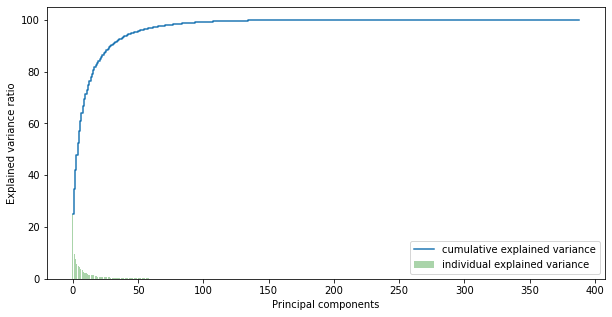

In [82]:
plot_explained_variance(sc.fit_transform(xTrain))


In [83]:
pca = PCA(n_components= 150)
xTrain_reduced = pca.fit(xTrain).transform(xTrain)
xTest_reduced = pca.fit(xTest).transform(xTest)

In [84]:
clf = LogisticRegression(random_state=0).fit(xTrain_reduced, yTrain)
pred = clf.predict(xTest_reduced)
print(classification_report(yTest, pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97    106268
         1.0       0.80      0.32      0.46      9118

    accuracy                           0.94    115386
   macro avg       0.87      0.66      0.71    115386
weighted avg       0.93      0.94      0.93    115386



#### LDA

In [88]:
lda = LDA()
xTrain_lda = lda.fit(xTrain, yTrain).transform(xTrain)
xTest_lda = lda.transform(xTest)


In [89]:
clf = LogisticRegression(random_state=0).fit(xTrain_lda, yTrain)
pred = clf.predict(xTest_lda)
print(classification_report(yTest, pred))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97    106268
         1.0       0.79      0.35      0.48      9118

    accuracy                           0.94    115386
   macro avg       0.87      0.67      0.73    115386
weighted avg       0.93      0.94      0.93    115386



**observation**

From classification report, we can find that PCA is better than LDA

# Task 2 